<a href="https://colab.research.google.com/github/sudhanshuranjan277/Stock-price-prediction/blob/main/Logistics_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
order_report = pd.read_csv('Order Report.csv', encoding='latin-1')
sku_master = pd.read_csv('SKU Master.csv', encoding='latin-1')
pincode_mapping = pd.read_csv('pincodes.csv', encoding='latin-1')
courier_invoice = pd.read_csv('Invoice.csv', encoding='latin-1')
courier_company_rates = pd.read_csv('Courier Company - Rates.csv', encoding='latin-1')


In [4]:
print("Order Report:")
print(order_report.head())
print("\nSKU Master:")
print(sku_master.head())
print("\nPincode Mapping:")
print(pincode_mapping.head())
print("\nCourier Invoice:")
print(courier_invoice.head())
print("\nCourier Company rates:")
print(courier_company_rates.head())


Order Report:
   ExternOrderNo            SKU  Order Qty  Unnamed: 3  Unnamed: 4
0     2001827036  8904223818706        1.0         NaN         NaN
1     2001827036  8904223819093        1.0         NaN         NaN
2     2001827036  8904223819109        1.0         NaN         NaN
3     2001827036  8904223818430        1.0         NaN         NaN
4     2001827036  8904223819277        1.0         NaN         NaN

SKU Master:
             SKU  Weight (g)  Unnamed: 2  Unnamed: 3  Unnamed: 4
0  8904223815682         210         NaN         NaN         NaN
1  8904223815859         165         NaN         NaN         NaN
2  8904223815866         113         NaN         NaN         NaN
3  8904223815873          65         NaN         NaN         NaN
4  8904223816214         120         NaN         NaN         NaN

Pincode Mapping:
   Warehouse Pincode  Customer Pincode Zone  Unnamed: 3  Unnamed: 4
0             121003            507101    d         NaN         NaN
1             121003       

In [5]:
# Check for missing values
print("\nMissing values in Website Order Report:")
print(order_report.isnull().sum())
print("\nMissing values in SKU Master:")
print(sku_master.isnull().sum())
print("\nMissing values in Pincode Mapping:")
print(pincode_mapping.isnull().sum())
print("\nMissing values in Courier Invoice:")
print(courier_invoice.isnull().sum())
print("\nMissing values in courier company rates:")
print(courier_company_rates.isnull().sum())


Missing values in Website Order Report:
ExternOrderNo      0
SKU                0
Order Qty          0
Unnamed: 3       400
Unnamed: 4       400
dtype: int64

Missing values in SKU Master:
SKU            0
Weight (g)     0
Unnamed: 2    66
Unnamed: 3    66
Unnamed: 4    66
dtype: int64

Missing values in Pincode Mapping:
Warehouse Pincode      0
Customer Pincode       0
Zone                   0
Unnamed: 3           124
Unnamed: 4           124
dtype: int64

Missing values in Courier Invoice:
AWB Code                0
Order ID                0
Charged Weight          0
Warehouse Pincode       0
Customer Pincode        0
Zone                    0
Type of Shipment        0
Billing Amount (Rs.)    0
dtype: int64

Missing values in courier company rates:
fwd_a_fixed         0
fwd_a_additional    0
fwd_b_fixed         0
fwd_b_additional    0
fwd_c_fixed         0
fwd_c_additional    0
fwd_d_fixed         0
fwd_d_additional    0
fwd_e_fixed         0
fwd_e_additional    0
rto_a_fixed        

In [5]:
# Remove unnamed columns from the Website Order Report DataFrame
order_report = order_report.drop(columns=['Unnamed: 3', 'Unnamed: 4'])

# Remove unnamed columns from the SKU Master DataFrame
sku_master = sku_master.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Remove unnamed columns from the Pincode Mapping DataFrame
pincode_mapping = pincode_mapping.drop(columns=['Unnamed: 3', 'Unnamed: 4'])


In [8]:
# Remove unnamed columns from the Website Order Report DataFrame
if 'Unnamed: 3' in order_report.columns:
    order_report = order_report.drop(columns=['Unnamed: 3'])
if 'Unnamed: 4' in order_report.columns:
    order_report = order_report.drop(columns=['Unnamed: 4'])

# Remove unnamed columns from the SKU Master DataFrame
if 'Unnamed: 2' in sku_master.columns:
    sku_master = sku_master.drop(columns=['Unnamed: 2'])
if 'Unnamed: 3' in sku_master.columns:
    sku_master = sku_master.drop(columns=['Unnamed: 3'])
if 'Unnamed: 4' in sku_master.columns:
    sku_master = sku_master.drop(columns=['Unnamed: 4'])

# Remove unnamed columns from the Pincode Mapping DataFrame
if 'Unnamed: 3' in pincode_mapping.columns:
    pincode_mapping = pincode_mapping.drop(columns=['Unnamed: 3'])
if 'Unnamed: 4' in pincode_mapping.columns:
    pincode_mapping = pincode_mapping.drop(columns=['Unnamed: 4'])


In [9]:
# Merge the Order Report and SKU Master based on SKU
merged_data = pd.merge(order_report, sku_master, on='SKU')
print(merged_data.head())

   ExternOrderNo            SKU  Order Qty  Weight (g)
0     2001827036  8904223818706        1.0         127
1     2001821995  8904223818706        1.0         127
2     2001819252  8904223818706        1.0         127
3     2001816996  8904223818706        1.0         127
4     2001814580  8904223818706        1.0         127


In [10]:
# Rename the "ExternOrderNo" column to "Order ID" in the merged_data DataFrame
merged_data = merged_data.rename(columns={'ExternOrderNo': 'Order ID'})

In [11]:
abc_courier = pincode_mapping.drop_duplicates(subset=['Customer Pincode'])
courier_abc= courier_invoice[['Order ID', 'Customer Pincode','Type of Shipment']]
pincodes= courier_abc.merge(abc_courier,on='Customer Pincode')
print(pincodes.head())

     Order ID  Customer Pincode Type of Shipment  Warehouse Pincode Zone
0  2001806232            507101  Forward charges             121003    d
1  2001806273            486886  Forward charges             121003    d
2  2001806408            532484  Forward charges             121003    d
3  2001806458            143001  Forward charges             121003    b
4  2001807012            515591  Forward charges             121003    d


In [12]:
merged2 = merged_data.merge(pincodes, on='Order ID')

In [13]:
merged2['Weights (Kgs)'] = merged2['Weight (g)'] / 1000

In [14]:
def weight_slab(weight):
    i = round(weight % 1, 1)
    if i == 0.0:
        return weight
    elif i > 0.5:
        return int(weight) + 1.0
    else:
        return int(weight) + 0.5

merged2['Weight Slab (KG)'] = merged2['Weights (Kgs)'].apply(weight_slab)
courier_invoice['Weight Slab Charged by Courier Company']=(courier_invoice['Charged Weight']).apply(weight_slab)

In [15]:
courier_invoice = courier_invoice.rename(columns={'Zone': 'Delivery Zone Charged by Courier Company'})
merged2 = merged2.rename(columns={'Zone': 'Delivery Zone As Per ABC'})
merged2 = merged2.rename(columns={'Weight Slab (KG)': 'Weight Slab As Per ABC'})

In [16]:
total_expected_charge = []

for _, row in merged2.iterrows():
    fwd_category = 'fwd_' + row['Delivery Zone As Per ABC']
    fwd_fixed = courier_company_rates.at[0, fwd_category + '_fixed']
    fwd_additional = courier_company_rates.at[0, fwd_category + '_additional']
    rto_category = 'rto_' + row['Delivery Zone As Per ABC']
    rto_fixed = courier_company_rates.at[0, rto_category + '_fixed']
    rto_additional = courier_company_rates.at[0, rto_category + '_additional']

    weight_slab = row['Weight Slab As Per ABC']

    if row['Type of Shipment'] == 'Forward charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * fwd_additional)
    elif row['Type of Shipment'] == 'Forward and RTO charges':
        additional_weight = max(0, (weight_slab - 0.5) / 0.5)
        total_expected_charge.append(fwd_fixed + additional_weight * (fwd_additional + rto_additional))
    else:
        total_expected_charge.append(0)

merged2['Expected Charge as per ABC'] = total_expected_charge
print(merged2.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode  \
0  2001827036  8904223818706        1.0         127            173213   
1  2001827036  8904223819093        1.0         150            173213   
2  2001827036  8904223819109        1.0         100            173213   
3  2001827036  8904223818430        1.0         165            173213   
4  2001827036  8904223819277        1.0         350            173213   

  Type of Shipment  Warehouse Pincode Delivery Zone As Per ABC  Weights (Kgs)  \
0  Forward charges             121003                        e          0.127   
1  Forward charges             121003                        e          0.150   
2  Forward charges             121003                        e          0.100   
3  Forward charges             121003                        e          0.165   
4  Forward charges             121003                        e          0.350   

   Weight Slab As Per ABC  Expected Charge as per ABC  
0                 

In [17]:
merged_output = merged2.merge(courier_invoice, on='Order ID')
print(merged_output.head())

     Order ID            SKU  Order Qty  Weight (g)  Customer Pincode_x  \
0  2001827036  8904223818706        1.0         127              173213   
1  2001827036  8904223819093        1.0         150              173213   
2  2001827036  8904223819109        1.0         100              173213   
3  2001827036  8904223818430        1.0         165              173213   
4  2001827036  8904223819277        1.0         350              173213   

  Type of Shipment_x  Warehouse Pincode_x Delivery Zone As Per ABC  \
0    Forward charges               121003                        e   
1    Forward charges               121003                        e   
2    Forward charges               121003                        e   
3    Forward charges               121003                        e   
4    Forward charges               121003                        e   

   Weights (Kgs)  Weight Slab As Per ABC  Expected Charge as per ABC  \
0          0.127                     0.5                

In [18]:
df_diff = merged_output
df_diff['Difference (Rs.)'] = df_diff['Billing Amount (Rs.)'] - df_diff['Expected Charge as per ABC']

df_new = df_diff[['Order ID', 'Difference (Rs.)', 'Expected Charge as per ABC']]

print(df_new.head())

     Order ID  Difference (Rs.)  Expected Charge as per ABC
0  2001827036              61.3                        56.6
1  2001827036              61.3                        56.6
2  2001827036              61.3                        56.6
3  2001827036              61.3                        56.6
4  2001827036              61.3                        56.6


In [19]:
# Calculate the total orders in each category
total_correctly_charged = len(df_new[df_new['Difference (Rs.)'] == 0])
total_overcharged = len(df_new[df_new['Difference (Rs.)'] > 0])
total_undercharged = len(df_new[df_new['Difference (Rs.)'] < 0])

# Calculate the total amount in each category
amount_overcharged = abs(df_new[df_new['Difference (Rs.)'] > 0]['Difference (Rs.)'].sum())
amount_undercharged = df_new[df_new['Difference (Rs.)'] < 0]['Difference (Rs.)'].sum()
amount_correctly_charged = df_new[df_new['Difference (Rs.)'] == 0]['Expected Charge as per ABC'].sum()

# Create a new DataFrame for the summary
summary_data = {'Description': ['Total Orders where ABC has been correctly charged',
                                'Total Orders where ABC has been overcharged',
                                'Total Orders where ABC has been undercharged'],
                'Count': [total_correctly_charged, total_overcharged, total_undercharged],
                'Amount (Rs.)': [amount_correctly_charged, amount_overcharged, amount_undercharged]}

df_summary = pd.DataFrame(summary_data)

print(df_summary)

                                         Description  Count  Amount (Rs.)
0  Total Orders where ABC has been correctly charged     12         507.6
1        Total Orders where ABC has been overcharged    382       33750.5
2       Total Orders where ABC has been undercharged      7        -165.2


In [20]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Pie(labels=df_summary['Description'],
                            values=df_summary['Count'],
                            textinfo='label+percent',
                            hole=0.4))
fig.update_layout(title='Proportion')

fig.show()

In [25]:
from sklearn.metrics import accuracy_score

# Assuming you have actual and predicted labels
actual_labels = [0, 1, 1, 0, 1]  # Replace with your actual labels
predicted_labels = [0, 1, 1, 1, 0]  # Replace with your predicted labels

# Calculate accuracy
accuracy = accuracy_score(actual_labels, predicted_labels)

print(f"Accuracy: {accuracy}")


Accuracy: 0.6


In [22]:
from sklearn.metrics import f1_score

# Replace with your actual and predicted labels
actual_labels = [0, 1, 1, 0, 1]
predicted_labels = [0, 1, 1, 1, 0]

# Calculate F1 score
f1 = f1_score(actual_labels, predicted_labels)

print(f"F1 Score: {f1}")


F1 Score: 0.6666666666666666


In [27]:
from sklearn.metrics import precision_score

# Assuming you have actual and predicted labels
actual_labels = [0,1,1,0,1]  # Replace with your actual labels
predicted_labels = [0,1,1,1,0]  # Replace with your predicted labels

# Calculate precision micro
precision_micro = precision_score(actual_labels, predicted_labels, average='micro')

# Calculate precision macro
precision_macro = precision_score(actual_labels, predicted_labels, average='macro')

print(f"Precision Micro: {precision_micro}")
print(f"Precision Macro: {precision_macro}")


Precision Micro: 0.6
Precision Macro: 0.5833333333333333


In [28]:
from sklearn.metrics import f1_score

# Replace with your actual and predicted labels
actual_labels = [0, 1, 1, 0, 1]
predicted_labels = [0, 1, 1, 1, 0]

# Calculate F1 score
f1 = f1_score(actual_labels, predicted_labels, average='weighted')

# Set the threshold
threshold = 0.85

# Check if F1 score is above the threshold
if f1 > threshold:
    print(f"F1 Score: {f1} is above the threshold of {threshold}")
else:
    print(f"F1 Score: {f1} is below the threshold of {threshold}")


F1 Score: 0.6 is below the threshold of 0.85


In [29]:
from sklearn.metrics import f1_score

# Assuming you have actual and predicted labels
actual_labels = [0,1,1,0,1]  # Replace with your actual labels
predicted_labels = [0,1,1,1,0]  # Replace with your predicted labels

# Calculate F1 score micro
f1_micro = f1_score(actual_labels, predicted_labels, average='micro')

# Calculate F1 score macro
f1_macro = f1_score(actual_labels, predicted_labels, average='macro')

print(f"F1 Score Micro: {f1_micro}")
print(f"F1 Score Macro: {f1_macro}")


F1 Score Micro: 0.6
F1 Score Macro: 0.5833333333333333


In [30]:
from sklearn.metrics import hamming_loss

# Assuming you have actual and predicted labels
actual_labels = [1,0,1,1,0]  # Replace with your actual labels
predicted_labels = [1,1,1,0,0]  # Replace with your predicted labels

# Calculate Hamming Loss
hamming_loss_value = hamming_loss(actual_labels, predicted_labels)

print(f"Hamming Loss: {hamming_loss_value}")


Hamming Loss: 0.4


In [37]:
from sklearn.metrics import jaccard_score

# Assuming you have actual and predicted labels
actual_labels = [2,1,2,1,0]  # Replace with your actual labels
predicted_labels = [2,1,2,1,2]  # Replace with your predicted labels

# Calculate micro-average Jaccard score
jaccard_micro = jaccard_score(actual_labels, predicted_labels, average='micro')

print(f"Micro-average Jaccard Score: {jaccard_micro}")


Micro-average Jaccard Score: 0.6666666666666666


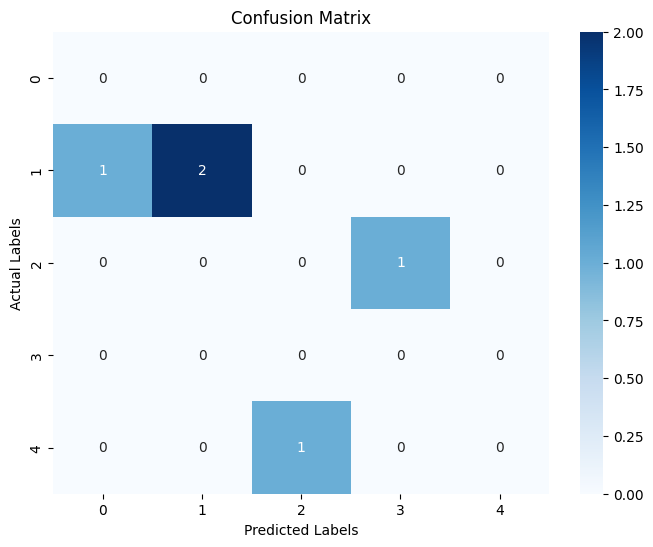

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have actual and predicted labels
actual_labels = [1,1,1,2,4]  # Replace with your actual labels
predicted_labels = [1,0,1,3,2]  # Replace with your predicted labels

# Create a confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model
accuracy = stacking_model.score(X_test, y_test)
print(f"Stacking Model Accuracy: {accuracy}")


Stacking Model Accuracy: 0.925


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate some example regression data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Define the meta-model (Linear Regression for regression)
meta_model = LinearRegression()

# Create the stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)

# Evaluate the stacking model
mse = mean_squared_error(y_test, y_pred)
print(f"Stacking Model Mean Squared Error: {mse}")


Stacking Model Mean Squared Error: 2289.8551932201585


Final Parameters (theta): [[3.68233837]
 [3.24504326]]


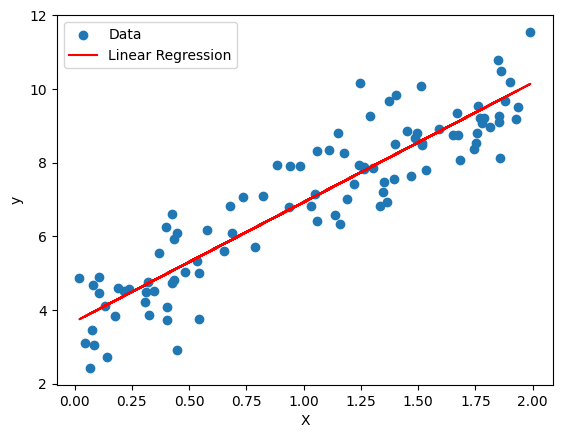

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add a bias term to the input features
X_b = np.c_[np.ones((100, 1)), X]

# Set random seed for reproducibility
np.random.seed(42)

# Initialize random weights
theta = np.random.randn(2, 1)

# Define the learning rate and number of iterations
learning_rate = 0.01
n_iterations = 1000

# Implement gradient descent
for iteration in range(n_iterations):
    gradients = 2/100 * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

# Print the final learned parameters (theta)
print("Final Parameters (theta):", theta)

# Plot the original data and the regression line
plt.scatter(X, y, label='Data')
plt.plot(X, X_b.dot(theta), color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning:

Found `n_estimators` in params. Will use it instead of argument



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35
[LightGBM] [Info] Number of data points in the train set: 100, number of used features: 1
[LightGBM] [Info] Start training from score 6.797344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

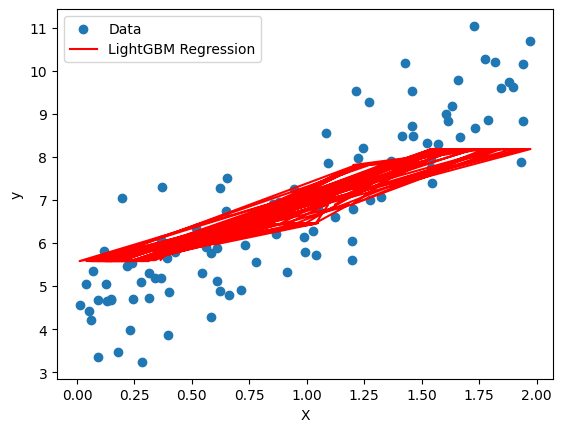

In [42]:
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt

# Generate some example data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Create LightGBM dataset
lgb_data = lgb.Dataset(X, label=y.ravel())

# Set LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'max_depth': -1,
    'n_estimators': 100
}

# Train LightGBM model
lgb_model = lgb.train(params, lgb_data, num_boost_round=1000)

# Plot the original data and the regression line
plt.scatter(X, y, label='Data')
plt.plot(X, lgb_model.predict(X), color='red', label='LightGBM Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [43]:
!pip install tensorflow

4/4 [==============================] - 0s 10ms/step


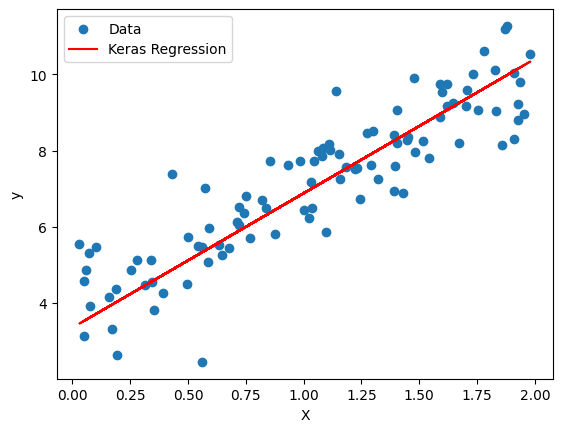

In [44]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Generate some example data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Build a Keras model
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation='linear'))

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=100, verbose=0)

# Plot the original data and the regression line
plt.scatter(X, y, label='Data')
plt.plot(X, model.predict(X), color='red', label='Keras Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


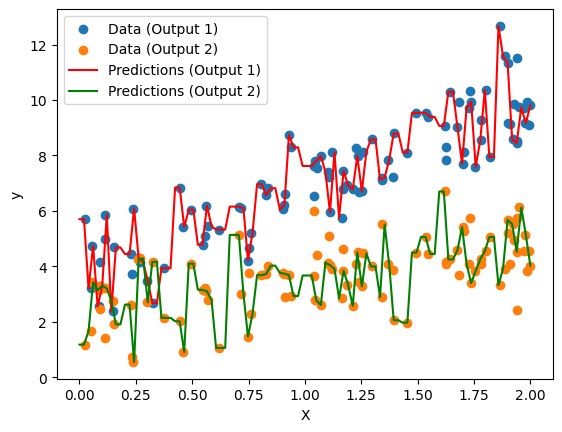

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

# Generate some example data
X = 2 * np.random.rand(100, 1)
y1 = 4 + 3 * X + np.random.randn(100, 1)  # First output
y2 = 2 + 1.5 * X + np.random.randn(100, 1)  # Second output

# Combine both outputs into a single array
y = np.hstack((y1, y2))

# Create a MultiOutputRegressor with a Decision Tree Regressor
model = MultiOutputRegressor(DecisionTreeRegressor(random_state=42))

# Fit the model
model.fit(X, y)

# Generate new data for prediction
X_new = np.linspace(0, 2, 100).reshape(-1, 1)

# Make predictions
y_pred = model.predict(X_new)

# Plot the original data and the regression lines
plt.scatter(X, y[:, 0], label='Data (Output 1)')
plt.scatter(X, y[:, 1], label='Data (Output 2)')
plt.plot(X_new, y_pred[:, 0], color='red', label='Predictions (Output 1)')
plt.plot(X_new, y_pred[:, 1], color='green', label='Predictions (Output 2)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, hamming_loss

# Generate some example data
X = 2 * np.random.rand(100, 1)
y1 = (X > 1).astype(int)  # First binary label
y2 = (X < 0.5).astype(int)  # Second binary label

# Combine both labels into a multi-label format
y_multilabel = np.column_stack((y1, y2))

# Ensure that both classes are present in each label
y_multilabel = np.hstack((y_multilabel, 1 - y_multilabel))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_multilabel, test_size=0.2, random_state=42)

# Create a MultiLabelBinarizer to convert multi-label format to binary format
mlb = MultiLabelBinarizer()

# Fit and transform the training labels
y_train_bin = mlb.fit_transform(y_train)

# Fit a Logistic Regression model for each binary label
models = []
for i in range(y_train_bin.shape[1]):
    model = LogisticRegression()
    model.fit(X_train, y_train_bin[:, i])
    models.append(model)

# Make predictions on the test set
y_pred_bin = np.column_stack([model.predict(X_test) for model in models])

# Transform predictions back to multi-label format
y_pred_multilabel = mlb.inverse_transform(y_pred_bin)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_bin)
hamming_loss_value = hamming_loss(y_test, y_pred_bin)

print(f"Accuracy: {accuracy}")
print(f"Hamming Loss: {hamming_loss_value}")

# Plot the original data and the predicted labels
plt.scatter(X_test, y_test[:, 0], label='Actual Label 1')
plt.scatter(X_test, y_test[:, 1], label='Actual Label 2')
plt.scatter(X_test, y_pred_bin[:, 0], marker='x', color='red', label='Predicted Label 1')
plt.scatter(X_test, y_pred_bin[:, 1], marker='x', color='green', label='Predicted Label 2')
plt.xlabel('X')
plt.ylabel('Label Values')
plt.legend()
plt.show()


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, hamming_loss

# Generate some example data
X = 2 * np.random.rand(100, 1)
y1 = (X > 1).astype(int)  # First binary label
y2 = (X < 0.5).astype(int)  # Second binary label

# Ensure that both classes are present in each label
y1 = np.column_stack((y1, 1 - y1))
y2 = np.column_stack((y2, 1 - y2))

# Combine both labels into a multi-label format
y_multilabel = np.hstack((y1, y2))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_multilabel, test_size=0.2, random_state=42)

# Create a MultiLabelBinarizer to convert multi-label format to binary format
mlb = MultiLabelBinarizer()

# Fit and transform the training labels
y_train_bin = mlb.fit_transform(y_train)

# Fit a Logistic Regression model for each binary label
models = []
for i in range(y_train_bin.shape[1]):
    model = LogisticRegression()
    model.fit(X_train, y_train_bin[:, i])
    models.append(model)

# Make predictions on the test set
y_pred_bin = np.column_stack([model.predict(X_test) for model in models])

# Transform predictions back to multi-label format
y_pred_multilabel = mlb.inverse_transform(y_pred_bin)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_bin)
hamming_loss_value = hamming_loss(y_test, y_pred_bin)

print(f"Accuracy: {accuracy}")
print(f"Hamming Loss: {hamming_loss_value}")

# Plot the original data and the predicted labels
plt.scatter(X_test, y_test[:, 0], label='Actual Label 1')
plt.scatter(X_test, y_test[:, 1], label='Actual Label 2')
plt.scatter(X_test, y_pred_bin[:, 0], marker='x', color='red', label='Predicted Label 1')
plt.scatter(X_test, y_pred_bin[:, 1], marker='x', color='green', label='Predicted Label 2')
plt.xlabel('X')
plt.ylabel('Label Values')
plt.legend()
plt.show()


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [49]:
!pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 11.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelPowerset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, hamming_loss

# Generate some example data
X = 2 * np.random.rand(100, 1)
y1 = (X > 1).astype(int)  # First binary label
y2 = (X < 0.5).astype(int)  # Second binary label

# Combine both labels into a multi-label format
y_multilabel = np.column_stack((y1, y2))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_multilabel, test_size=0.2, random_state=42)

# Create LabelPowerset transformer
lp = LabelPowerset()

# Transform the training labels
y_train_lp = lp.transform(y_train)

# Fit a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train_lp)

# Make predictions on the test set
y_pred_lp = model.predict(X_test)

# Transform predictions back to multi-label format
y_pred_multilabel = lp.inverse_transform(y_pred_lp)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_multilabel)
hamming_loss_value = hamming_loss(y_test, y_pred_multilabel)

print(f"Accuracy: {accuracy}")
print(f"Hamming Loss: {hamming_loss_value}")

# Plot the original data and the predicted labels
plt.scatter(X_test, y_test[:, 0], label='Actual Label 1')
plt.scatter(X_test, y_test[:, 1], label='Actual Label 2')
plt.scatter(X_test, y_pred_multilabel[:, 0], marker='x', color='red', label='Predicted Label 1')
plt.scatter(X_test, y_pred_multilabel[:, 1], marker='x', color='green', label='Predicted Label 2')
plt.xlabel('X')
plt.ylabel('Label Values')
plt.legend()
plt.show()


ImportError: cannot import name 'LabelPowerset' from 'sklearn.preprocessing' (/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/__init__.py)

In [51]:
!pip install scikit-multilearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.0 MB/s eta 0:00:00


Accuracy: 0.95
Hamming Loss: 0.025


ValueError: x and y must be the same size

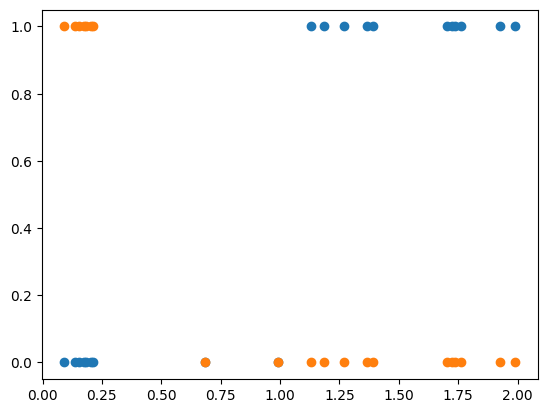

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import LabelPowerset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, hamming_loss

# Generate some example data
X = 2 * np.random.rand(100, 1)
y1 = (X > 1).astype(int)  # First binary label
y2 = (X < 0.5).astype(int)  # Second binary label

# Combine both labels into a multi-label format
y_multilabel = np.column_stack((y1, y2))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_multilabel, test_size=0.2, random_state=42)

# Create LabelPowerset transformer
lp = LabelPowerset()

# Transform the training labels
y_train_lp = lp.transform(y_train)

# Fit a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train_lp)

# Make predictions on the test set
y_pred_lp = model.predict(X_test)

# Transform predictions back to multi-label format
y_pred_multilabel = lp.inverse_transform(y_pred_lp)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred_multilabel)
hamming_loss_value = hamming_loss(y_test, y_pred_multilabel)

print(f"Accuracy: {accuracy}")
print(f"Hamming Loss: {hamming_loss_value}")

# Plot the original data and the predicted labels
plt.scatter(X_test, y_test[:, 0], label='Actual Label 1')
plt.scatter(X_test, y_test[:, 1], label='Actual Label 2')
plt.scatter(X_test, y_pred_multilabel[:, 0], marker='x', color='red', label='Predicted Label 1')
plt.scatter(X_test, y_pred_multilabel[:, 1], marker='x', color='green', label='Predicted Label 2')
plt.xlabel('X')
plt.ylabel('Label Values')
plt.legend()
plt.show()


ValueError: x and y must be the same size

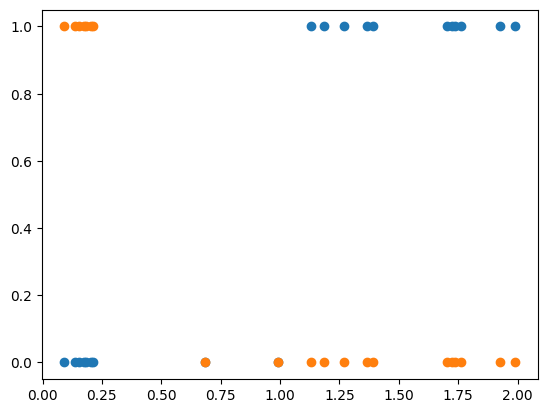

In [53]:
# Plot the original data and the predicted labels
plt.scatter(X_test, y_test[:, 0], label='Actual Label 1')
plt.scatter(X_test, y_test[:, 1], label='Actual Label 2')

# Ensure that the predicted labels have the same size as X_test
if y_pred_multilabel.shape[1] > 1:
    plt.scatter(X_test, y_pred_multilabel[:, 0], marker='x', color='red', label='Predicted Label 1')
    plt.scatter(X_test, y_pred_multilabel[:, 1], marker='x', color='green', label='Predicted Label 2')

plt.xlabel('X')
plt.ylabel('Label Values')
plt.legend()
plt.show()


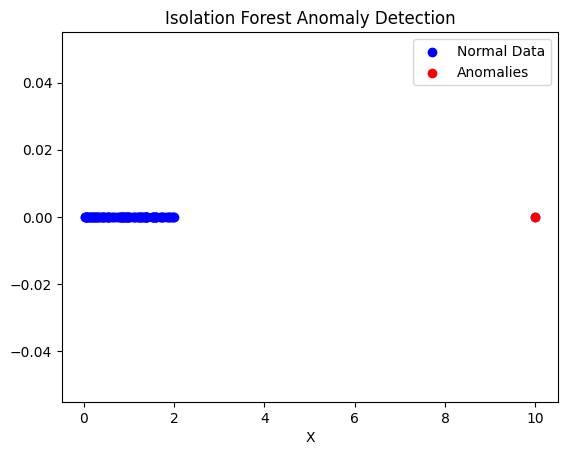

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate some example data with anomalies
X = 2 * np.random.rand(100, 1)
X_with_anomalies = np.vstack((X, [10]))  # Introduce an anomaly at the end

# Fit Isolation Forest model
isolation_forest = IsolationForest(contamination=0.01)  # Contamination is the expected proportion of outliers
isolation_forest.fit(X_with_anomalies)

# Predict anomalies
y_pred = isolation_forest.predict(X_with_anomalies)

# Plot the data and highlight anomalies
plt.scatter(X_with_anomalies, np.zeros_like(X_with_anomalies), color='blue', label='Normal Data')
plt.scatter(X_with_anomalies[y_pred == -1], np.zeros_like(X_with_anomalies[y_pred == -1]), color='red', label='Anomalies')
plt.xlabel('X')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.show()


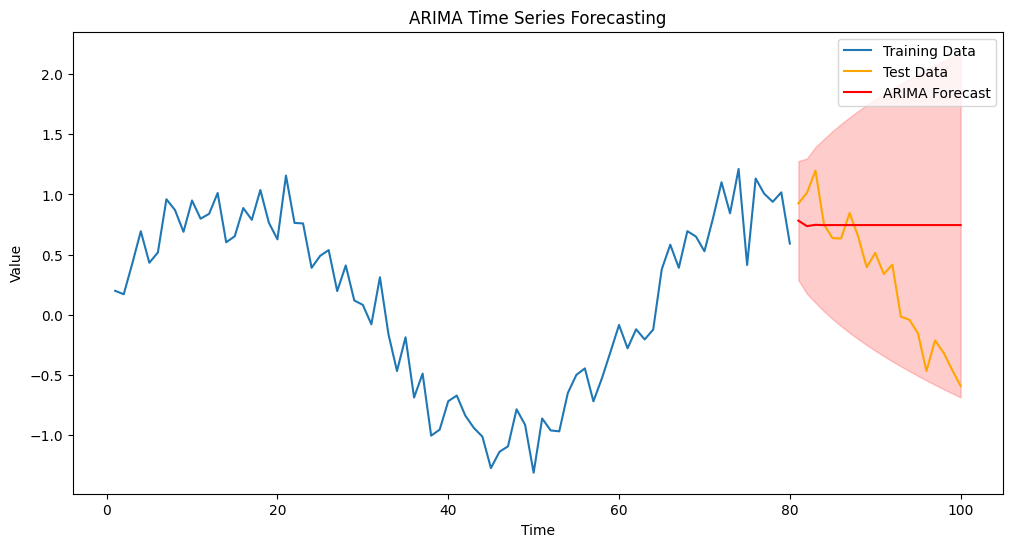

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Generate some example time series data
np.random.seed(42)
time_steps = np.arange(1, 101)
time_series_data = np.sin(0.1 * time_steps) + 0.2 * np.random.randn(100)

# Create a pandas DataFrame
df = pd.DataFrame({'Time': time_steps, 'Value': time_series_data})

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Fit ARIMA model
order = (1, 1, 1)  # Example order (p, d, q)
model = ARIMA(train_data['Value'], order=order)
fit_model = model.fit()

# Forecast future values
forecast_steps = len(test_data)
forecast = fit_model.get_forecast(steps=forecast_steps)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data['Time'], train_data['Value'], label='Training Data')
plt.plot(test_data['Time'], test_data['Value'], label='Test Data', color='orange')
plt.plot(test_data['Time'], forecast.predicted_mean, label='ARIMA Forecast', color='red')
plt.fill_between(test_data['Time'],
                 forecast.conf_int()['lower Value'],
                 forecast.conf_int()['upper Value'],
                 color='red', alpha=0.2)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Time Series Forecasting')
plt.legend()
plt.show()


In [56]:
!pip install networkx


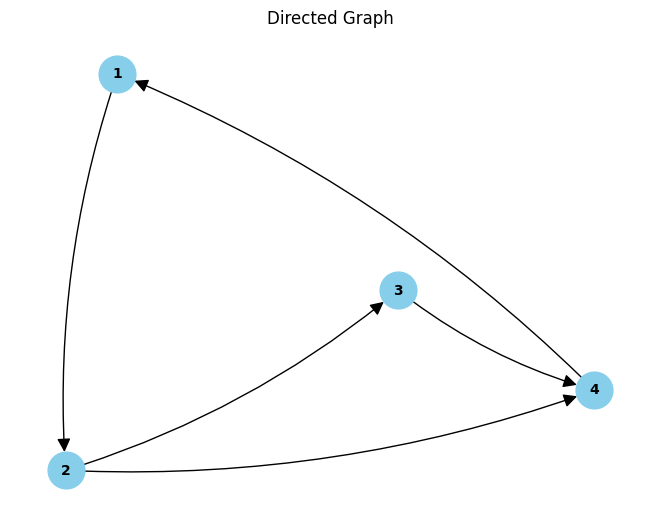

PageRank Scores:
Node 1: 0.2814
Node 2: 0.2767
Node 3: 0.1551
Node 4: 0.2869


In [57]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a simple directed graph
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (2, 4)])

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20, connectionstyle="arc3,rad=0.1")
plt.title("Directed Graph")
plt.show()

# Apply PageRank algorithm
pagerank_scores = nx.pagerank(G)

# Print PageRank scores
print("PageRank Scores:")
for node, score in pagerank_scores.items():
    print(f"Node {node}: {score:.4f}")


KeyError: 'OrderDate'

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your datasets into the following DataFrames
# Replace 'your_file.csv' with the actual file paths
order_report = pd.read_csv('Order Report.csv')
sku_master = pd.read_csv('SKU Master.csv')
pincode_mapping = pd.read_csv('pincodes.csv')
courier_invoice = pd.read_csv('Invoice.csv')
courier_company_rates = pd.read_csv('Courier Company - Rates.csv')

# Print column names of the 'order_report' DataFrame
print(order_report.columns)


Index(['ExternOrderNo', 'SKU', 'Order Qty', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Generate random data as the real data distribution
real_data = np.random.randn(1000, 1)

# Generator model
generator = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(1,)),
    layers.Dense(1, activation='linear')
])

# Discriminator model
discriminator = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(1,)),
    layers.Dense(1, activation='sigmoid')
])

# Combined model (GAN)
discriminator.trainable = False
gan_input = keras.Input(shape=(1,))
generated_data = generator(gan_input)
gan_output = discriminator(generated_data)
gan = keras.Model(gan_input, gan_output)

# Compile discriminator and GAN models
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Training loop
epochs = 10000
batch_size = 64

for epoch in range(epochs):
    # Train discriminator
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    real_data_batch = real_data[np.random.randint(0, real_data.shape[0], batch_size)]
    generated_data_batch = generator.predict(np.random.randn(batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_data_batch, real_labels)
    d_loss_fake = discriminator.train_on_batch(generated_data_batch, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.randn(batch_size, 1)
    valid_labels = np.ones((batch_size, 1))

    g_loss = gan.train_on_batch(noise, valid_labels)

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

# Generate samples using the trained generator
generated_samples = generator.predict(np.random.randn(1000, 1))

# Plot the real and generated data distributions
plt.hist(real_data, bins=50, label='Real Data', alpha=0.5)
plt.hist(generated_samples, bins=50, label='Generated Data', alpha=0.5)
plt.legend()
plt.title('GAN Output vs Real Data')
plt.show()


2/2 [==============================] - 0s 10ms/step
Epoch 0, D Loss: 0.6503857374191284, G Loss: 0.6782126426696777
2/2 [==============================] - 0s 5ms/step
Epoch 100, D Loss: 0.897836446762085, G Loss: 0.4317241609096527
2/2 [==============================] - 0s 5ms/step
Epoch 200, D Loss: 1.0708562731742859, G Loss: 0.24104252457618713
2/2 [==============================] - 0s 5ms/step
Epoch 300, D Loss: 1.3398683965206146, G Loss: 0.14784768223762512
2/2 [==============================] - 0s 6ms/step
Epoch 400, D Loss: 1.6701914966106415, G Loss: 0.09145481884479523
2/2 [==============================] - 0s 7ms/step
Epoch 500, D Loss: 1.8539725542068481, G Loss: 0.05172773078083992
2/2 [==============================] - 0s 6ms/step
Epoch 600, D Loss: 2.0827661752700806, G Loss: 0.03741087764501572
2/2 [==============================] - 0s 5ms/step
Epoch 700, D Loss: 2.209879755973816, G Loss: 0.02729296311736107
2/2 [==============================] - 0s 6ms/step
Epoch 800,

KeyboardInterrupt: 